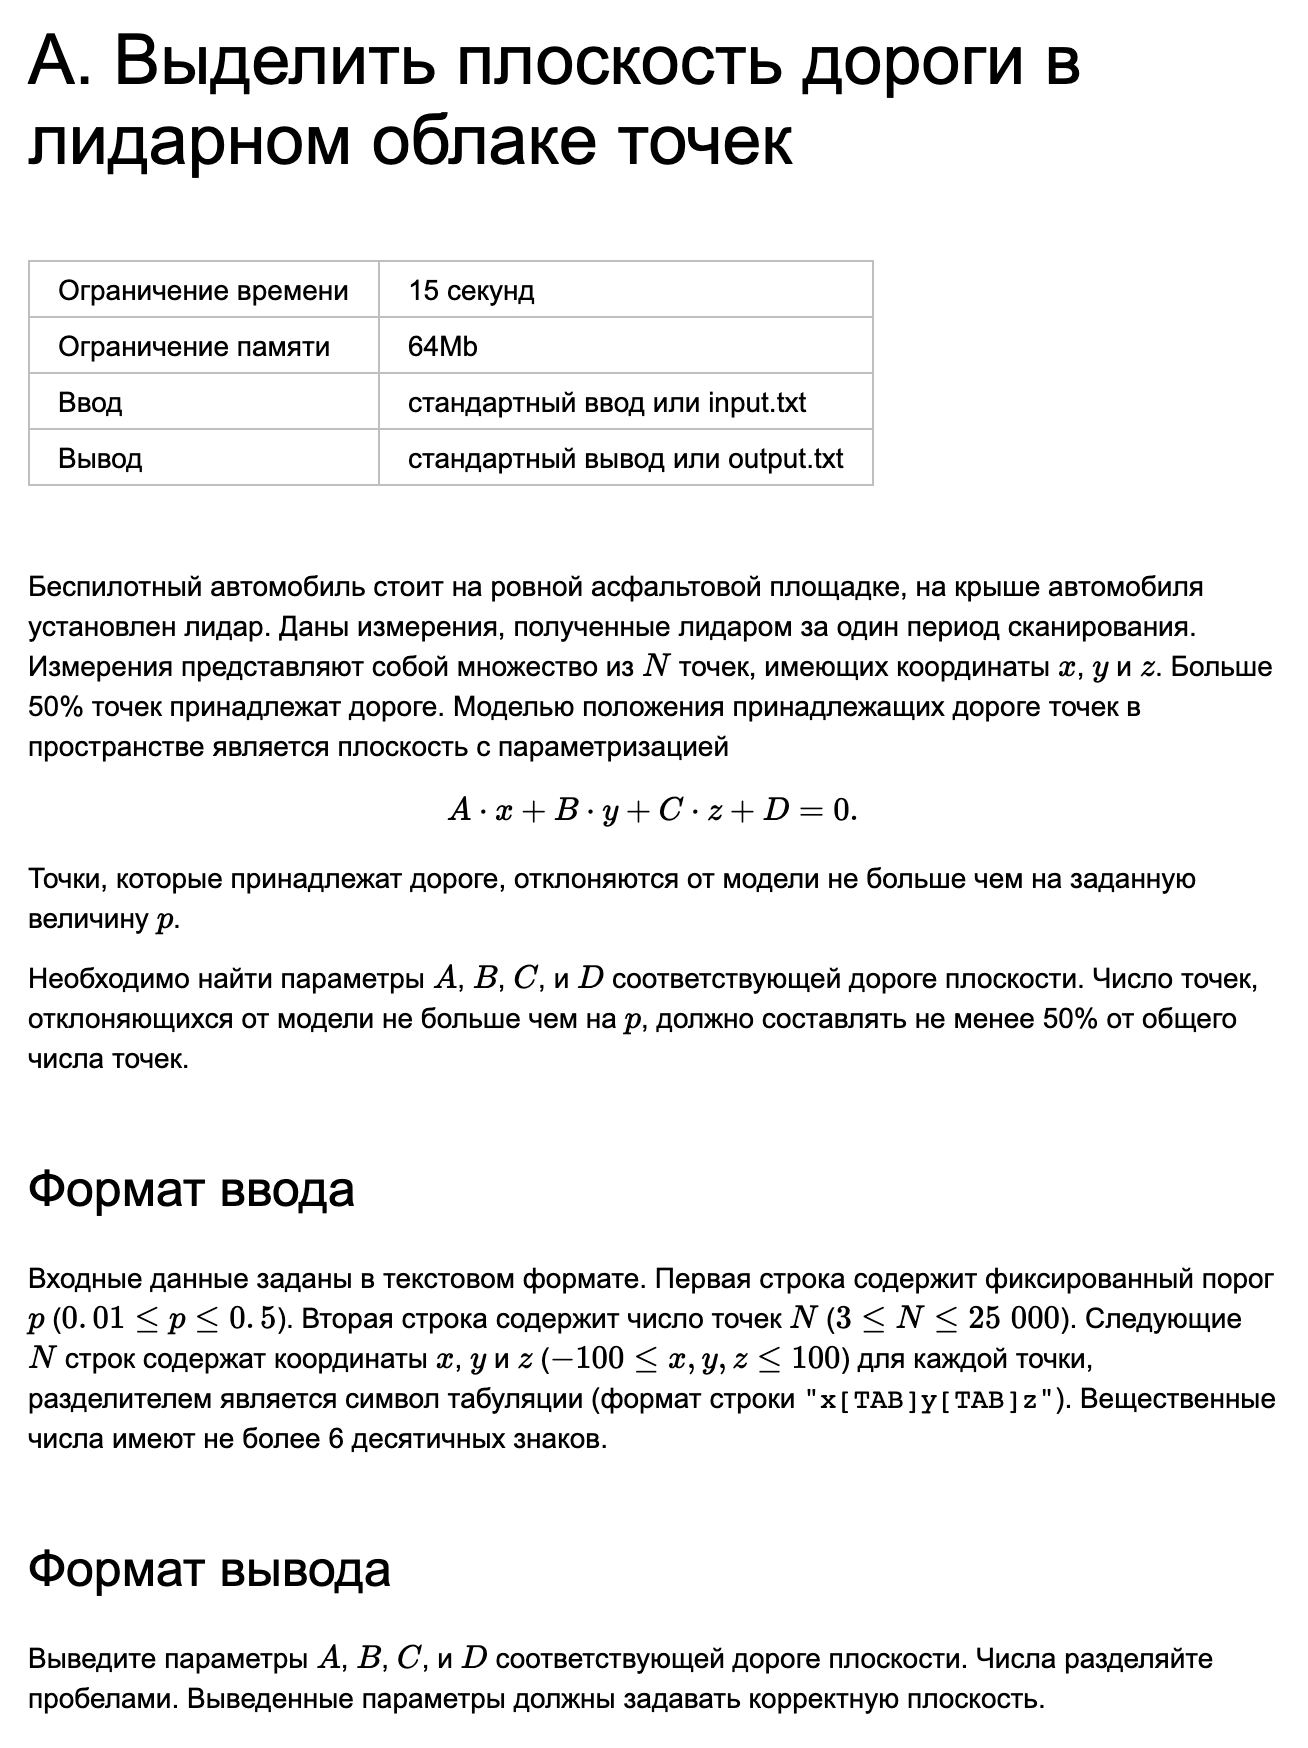

In [34]:
%%writefile input.txt
0.01
3
20	0	3
10	-10	2
10	10	2

Overwriting input.txt


In [35]:
!ls testcases/

sdc_point_cloud.txt


In [4]:
import numpy as np


file = open('input.txt')
# file = open('testcases/sdc_point_cloud.txt')

xs, ys, zs = [], [], []
    
lines = file.readlines()

tol = lines[0]
points_num = lines[1]

for line in lines[2:]:
    x, y, z = map(float, line.strip().split())
    xs.append(x)
    ys.append(y)
    zs.append(z)
    
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i]])
    tmp_b.append(zs[i])

X = np.array(tmp_A)
y = np.array(tmp_b)
    


b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b



print(-fit[0], -fit[1], 1.0, -fit[2])


Z = np.vstack((X.T,y)).T
U, Sigma, Vt = np.linalg.svd(Z, full_matrices=True)

print("Z = \n", Z)

n = 3
Vxy = Vt[n:, n:]  

print(Vt)
print(Vxy)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [37]:
Vt[2:, 2:]

array([[ 0.70580865,  0.68959251],
       [-0.70534562,  0.70534562]])

In [38]:
Vt[:2, 2:]

array([[-6.57397394e-02, -1.64163748e-01],
       [-1.17804307e-16, -1.06176561e-16]])

In [39]:
- Vt[2:, 2:] / Vt[:2, 2:]

array([[ 1.07364078e+01,  4.20063817e+00],
       [-5.98743489e+15,  6.64313864e+15]])

In [40]:
 Vt[-1, :]

array([-7.05345616e-02, -6.40236109e-19, -7.05345616e-01,  7.05345616e-01])

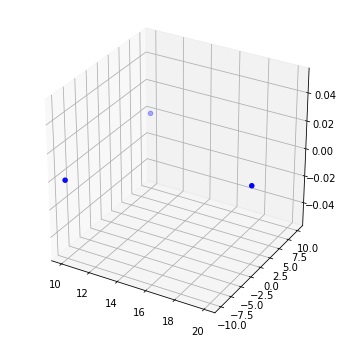

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np


# plot raw data
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')

In [16]:
%%writefile input.txt
0.01
10
20	-10	0.2
20	0	0.2
20	10	0.2
15	-10	0.15
15	0	0.15
15	10	0.15
10	-10	0.1
10	10	0.1
20	18	1.7
15	-15	1.2

Overwriting input.txt


In [17]:
import numpy as np


file = open('input.txt')
# file = open('testcases/sdc_point_cloud.txt')

xs, ys, zs = [], [], []
    
lines = file.readlines()

tol = lines[0]
points_num = lines[1]

for line in lines[2:]:
    x, y, z = map(float, line.strip().split())
    xs.append(x)
    ys.append(y)
    zs.append(z)
    
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i]])
    tmp_b.append(zs[i])

X = np.array(tmp_A)
y = np.array(tmp_b)

In [18]:
XYZ = np.vstack((X.T,y)).T

In [19]:
XYZ

array([[ 20.  , -10.  ,   0.2 ],
       [ 20.  ,   0.  ,   0.2 ],
       [ 20.  ,  10.  ,   0.2 ],
       [ 15.  , -10.  ,   0.15],
       [ 15.  ,   0.  ,   0.15],
       [ 15.  ,  10.  ,   0.15],
       [ 10.  , -10.  ,   0.1 ],
       [ 10.  ,  10.  ,   0.1 ],
       [ 20.  ,  18.  ,   1.7 ],
       [ 15.  , -15.  ,   1.2 ]])

In [26]:
#library imports
import numpy as np
import math
import matplotlib.pyplot    as     plt
%matplotlib notebook
from   mpl_toolkits.mplot3d import Axes3D

#values used for best plane fit
# xyz = np.array([[-1.04194694, -1.17965867,  1.09517722],
# [-0.39947906, -1.37104542,  1.36019265],
# [-1.0634807 , -1.35020616,  0.46773962],
# [-0.48640524, -1.64476106,  0.2726187 ],
# [-0.05720509, -1.6791781 ,  0.76964551],
# [-1.27522669, -1.10240358,  0.33761405],
# [-0.61274031, -1.52709874, -0.09945502],
# [-1.402693  , -0.86807757,  0.88866091],
# [-0.72520241, -0.86800727,  1.69729388]])
xyz = XYZ

''' best plane fit'''
#1.calculate centroid of points and make points relative to it
centroid         = xyz.mean(axis = 0)
xyzT             = np.transpose(xyz)
xyzR             = xyz - centroid                         #points relative to centroid
xyzRT            = np.transpose(xyzR)                       

#2. calculate the singular value decomposition of the xyzT matrix and get the normal as the last column of u matrix
u, sigma, v       = np.linalg.svd(xyzR)
normal            = v[2]                                 
normal            = normal / np.linalg.norm(normal)       #we want normal vectors normalized to unity

'''matplotlib display'''
#prepare normal vector for display
forGraphs = list()
forGraphs.append(np.array([centroid[0],centroid[1],centroid[2],normal[0],normal[1], normal[2]]))

#get d coefficient to plane for display
d = normal[0] * centroid[0] + normal[1] * centroid[1] + normal[2] * centroid[2]

# create x,y for display
minPlane = int(math.floor(min(min(xyzT[0]), min(xyzT[1]), min(xyzT[2]))))
maxPlane = int(math.ceil(max(max(xyzT[0]), max(xyzT[1]), max(xyzT[2]))))
xx, yy = np.meshgrid(range(minPlane,maxPlane), range(minPlane,maxPlane))

# calculate corresponding z for display
z = (-normal[0] * xx - normal[1] * yy + d) * 1. /normal[2]

#matplotlib display code
forGraphs = np.asarray(forGraphs)
X, Y, Z, U, V, W = zip(*forGraphs)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(xyzT[0],xyzT[1],xyzT[2])
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([min(xyzT[0])- 0.1, max(xyzT[0]) + 0.1])
ax.set_ylim([min(xyzT[1])- 0.1, max(xyzT[1]) + 0.1])
ax.set_zlim([min(xyzT[2])- 0.1, max(xyzT[2]) + 0.1])   



<IPython.core.display.Javascript object>


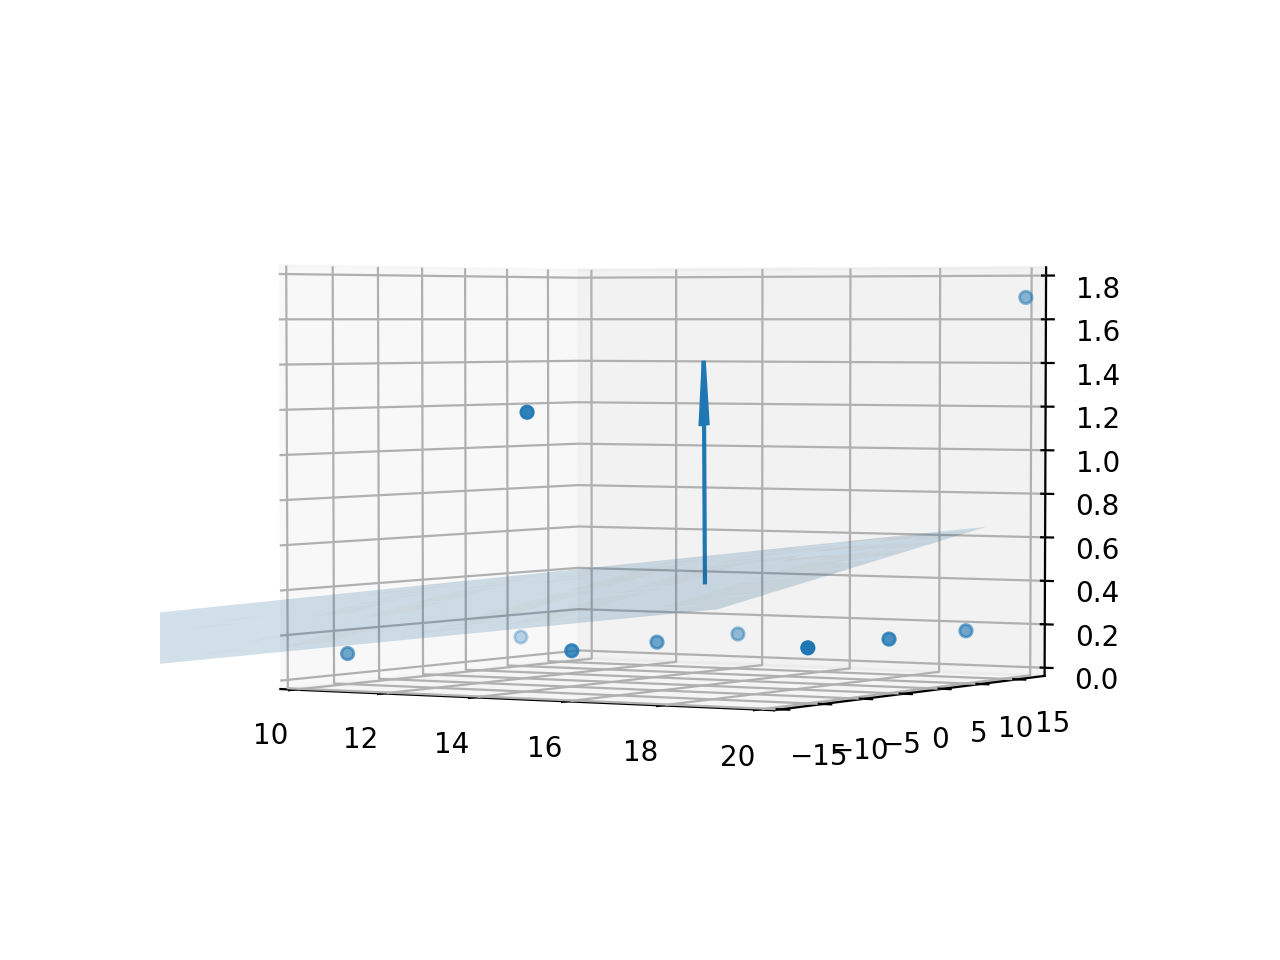

(0.0, 1.8)

In [27]:
#matplotlib display code
forGraphs = np.asarray(forGraphs)
X, Y, Z, U, V, W = zip(*forGraphs)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, alpha=0.2)
ax.scatter(xyzT[0],xyzT[1],xyzT[2])
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([min(xyzT[0])- 0.1, max(xyzT[0]) + 0.1])
ax.set_ylim([min(xyzT[1])- 0.1, max(xyzT[1]) + 0.1])
ax.set_zlim([min(xyzT[2])- 0.1, max(xyzT[2]) + 0.1])   


In [22]:
normal

array([-0.0418785 , -0.00672239,  0.9991001 ])

In [23]:
d

-0.25744617031497474

array([[-2.23152066e-16,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,
         9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
         1.20000000e+00,  1.30000000e+00,  1.40000000e+00,
         1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
         1.80000000e+00,  1.90000000e+00,  2.00000000e+00,
         2.10000000e+00,  2.20000000e+00,  2.30000000e+00,
         2.40000000e+00,  2.50000000e+00,  2.60000000e+00,
         2.70000000e+00,  2.80000000e+00,  2.90000000e+00],
       [-2.23152066e-16,  1.00000000e-01,  2.00000000e-01,
         3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,
         9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
         1.20000000e+00,  1.30000000e+00,  1.40000000e+00,
         1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
         1.80000000e+00,  1.90000000e+00,  2.00000000e+